In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
from google.colab import auth
import gspread
from google.auth import default

In [4]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [6]:
worksheet = gc.open('Experiment1').sheet1
data = worksheet.get_all_values()
df = pd.DataFrame(data[1:], columns=data[0])
df = df.astype({'Input1':'float'})
df = df.astype({'Output':'float'})
df.head()

,Input1,Output
0,1.0,11.0
1,2.0,21.0
2,3.0,31.0
3,4.0,41.0
4,5.0,51.0


In [8]:
X = df[['Input1']].values
y = df[['Output']].values
X

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.],
       [21.],
       [22.],
       [23.],
       [24.],
       [25.]])

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)
Scaler = MinMaxScaler()
Scaler.fit(X_train)
X_train1 = Scaler.transform(X_train)
X_train1

array([[0.90909091],
       [1.        ],
       [0.68181818],
       [0.5       ],
       [0.        ],
       [0.81818182],
       [0.54545455],
       [0.40909091],
       [0.59090909],
       [0.22727273],
       [0.09090909],
       [0.36363636],
       [0.77272727],
       [0.04545455],
       [0.27272727],
       [0.86363636]])

In [10]:
aimodel=Sequential([
    Dense(7,activation='relu'),
    Dense(6,activation='relu'),
    Dense(1)
])

In [11]:
aimodel.compile(optimizer='rmsprop',loss='mse')
aimodel.fit(X_train1,y_train,epochs=2000)
aimodel.fit(X_train1,y_train,epochs=2000)


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 14ms/step - loss: 12840.6777
Epoch 1128/2000
1/1 [==============================] - 0s 12ms/step - loss: 12825.4502
Epoch 1129/2000
1/1 [==============================] - 0s 10ms/step - loss: 12810.2148
Epoch 1130/2000
1/1 [==============================] - 0s 8ms/step - loss: 12794.9707
Epoch 1131/2000
1/1 [==============================] - 0s 10ms/step - loss: 12779.7168
Epoch 1132/2000
1/1 [==============================] - 0s 9ms/step - loss: 12764.4570
Epoch 1133/2000
1/1 [==============================] - 0s 10ms/step - loss: 12749.1875
Epoch 1134/2000
1/1 [==============================] - 0s 10ms/step - loss: 12733.9082
Epoch 1135/2000
1/1 [==============================] - 0s 9ms/step - loss: 12718.6230
Epoch 1136/2000
1/1 [==============================] - 0s 10ms/step - loss: 12703.3291
Epoch 1137/2000
1/1 [==============================] - 0s 8ms/step - loss: 12688.0254
Epoch 1138/2

<Axes: >

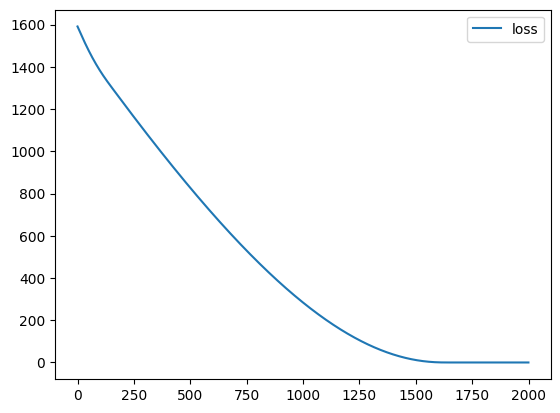

In [12]:
loss_df = pd.DataFrame(aimodel.history.history)
loss_df.plot()

In [13]:
X_test1 = Scaler.transform(X_test)
aimodel.evaluate(X_test1,y_test)

1/1 [==============================] - 0s 145ms/step - loss: 0.0101


0.010096392594277859

In [14]:
X_n1 = [[30]]
X_n1_1 = Scaler.transform(X_n1)
aimodel.predict(X_n1_1)

1/1 [==============================] - 0s 99ms/step


array([[300.8353]], dtype=float32)